unit8 인구 구조를 다양한 형태로 시각화하기

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<BarContainer object of 10 artists>

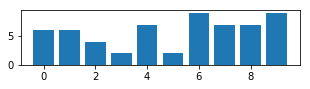

In [2]:
# 막대 그래프 : (x,y)
plt.figure(figsize=(5,1))
plt.bar(np.arange(10), np.random.randint(1,10,size =10))

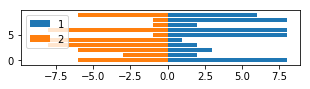

In [6]:
plt.figure(figsize=(5,1))
plt.barh(np.arange(10), np.random.randint(1,10,size =10), label = '1') # bar horizontal
plt.barh(np.arange(10), -np.random.randint(1,10,size =10), label = '2')
plt.legend()

In [59]:
gf = pd.read_csv('gender.csv', encoding = 'cp949')

gf = gf.replace(',', '', regex=True)
gf = gf.dropna()
gf.shape

(23, 207)

In [36]:
gf.head(n=1)

,행정구역,2019년01월_남_총인구수,2019년01월_남_연령구간인구수,2019년01월_남_0세,2019년01월_남_1세,2019년01월_남_2세,2019년01월_남_3세,2019년01월_남_4세,2019년01월_남_5세,2019년01월_남_6세,...,2019년01월_여_91세,2019년01월_여_92세,2019년01월_여_93세,2019년01월_여_94세,2019년01월_여_95세,2019년01월_여_96세,2019년01월_여_97세,2019년01월_여_98세,2019년01월_여_99세,2019년01월_여_100세 이상
0,서울특별시 강남구 (1168000000),"259,553","259,553","1,413","1,557","1,639","1,799","1,978","2,089","2,450",...,271,227,191,128,124,87,75,57,34,198


- 특정 도시(강남구)의 여성과 남성의 나이별 인구수 대조
- 컬럼 위치 찾기 : 남 0세 _남 90세, 여 0세 ~여 90세
- 0세 : 10명, 1세 20명 도시에서 모두 누적 > 막대 그래프로 표현

In [37]:
gf.columns

Index(['행정구역', '2019년01월_남_총인구수', '2019년01월_남_연령구간인구수', '2019년01월_남_0세',
       '2019년01월_남_1세', '2019년01월_남_2세', '2019년01월_남_3세', '2019년01월_남_4세',
       '2019년01월_남_5세', '2019년01월_남_6세',
       ...
       '2019년01월_여_91세', '2019년01월_여_92세', '2019년01월_여_93세', '2019년01월_여_94세',
       '2019년01월_여_95세', '2019년01월_여_96세', '2019년01월_여_97세', '2019년01월_여_98세',
       '2019년01월_여_99세', '2019년01월_여_100세 이상'],
      dtype='object', length=207)

In [54]:
max_age = 90
city = '서울특별시 강남'
man_0 = '2019년01월_남_0세'
woman_0 = '2019년01월_여_0세'
#type(list(gf.columns))
columns = list(gf.columns)
man_0_index = list(gf.columns).index(man_0)
woman_0_index = list(gf.columns).index(woman_0)
man_0_index ,woman_0_index, 
columns[man_0_index + max_age], columns[woman_0_index + max_age]


('2019년01월_남_90세', '2019년01월_여_90세')

In [39]:
data = np.array(gf)
area = data[:, 0]
# area[:3]
city_row_index = -1
for i in range(len(area)):
    if city in area[i]:
        print(i, area[i])
        city_row_index = i

0 서울특별시 강남구 (1168000000)
1 서울특별시 강남구 신사동(1168051000)
2 서울특별시 강남구 논현1동(1168052100)
3 서울특별시 강남구 논현2동(1168053100)
4 서울특별시 강남구 압구정동(1168054500)
5 서울특별시 강남구 청담동(1168056500)
6 서울특별시 강남구 삼성1동(1168058000)
7 서울특별시 강남구 삼성2동(1168059000)
8 서울특별시 강남구 대치1동(1168060000)
9 서울특별시 강남구 대치2동(1168061000)
10 서울특별시 강남구 대치4동(1168063000)
11 서울특별시 강남구 역삼1동(1168064000)
12 서울특별시 강남구 역삼2동(1168065000)
13 서울특별시 강남구 도곡1동(1168065500)
14 서울특별시 강남구 도곡2동(1168065600)
15 서울특별시 강남구 개포1동(1168066000)
16 서울특별시 강남구 개포2동(1168067000)
17 서울특별시 강남구 개포4동(1168069000)
18 서울특별시 강남구 세곡동(1168070000)
19 서울특별시 강남구 일원본동(1168072000)
20 서울특별시 강남구 일원1동(1168073000)
21 서울특별시 강남구 일원2동(1168074000)
22 서울특별시 강남구 수서동(1168075000)


In [60]:
city_data = data[city_row_index]
city_man = city_data[man_0_index:man_0_index + max_age].astype(np.int)
city_woman = city_data[woman_0_index:woman_0_index + max_age].astype(np.int)
city_man.shape, city_woman.shape

((90,), (90,))

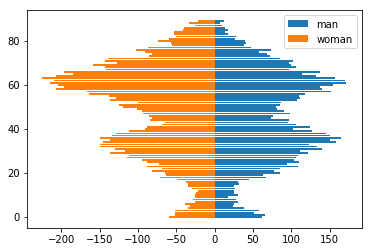

In [61]:
m = plt.barh(np.arange(len(city_man)), city_man, label = 'man')
m = plt.barh(np.arange(len(city_woman)), -city_woman, label = 'woman')
m = plt.legend()

In [62]:
city = '서울'
is_contain = []
for i in range(len(area)):
    is_contain.append(city in area[i])
np.mean(is_contain)
city_data = data[is_contain]
city_data.shape

(23, 207)

In [65]:
city_man = city_data[:, man_0_index:man_0_index+max_age].astype(np.int)
city_woman = city_data[woman_0_index:woman_0_index+max_age].astype(np.int)
city_man.shape, city_woman.shape
city_man = np.sum(city_man, axis=0)
city_woman = np.sum(city_woman, axis=0)

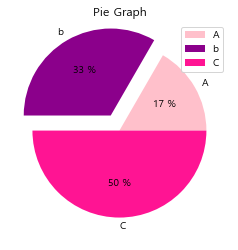

In [77]:
plt.rc('font', family="Malgun Gothic")
color = ['pink', 'darkmagenta', 'deeppink']
plt.title('Pie Graph')
m = plt.pie([10,20,30], labels= ['A', 'b', 'C'], autopct='%.0f %%', colors=color, explode = (0, 0.2, 0))
m = plt.legend()

In [120]:
df = pd.read_csv('gender_x.csv', encoding='cp949')
df = df.replace(',', '', regex=True) 
df.shape

max_age = 99
man_0 = '2019년01월_남_0세'
woman_0 = '2019년01월_여_0세'
columns = list(df.columns)
man_0_index = columns.index(man_0)
woman_0_index = columns.index(woman_0)
columns[man_0_index], columns[man_0_index + max_age]
columns[woman_0_index],columns[woman_0_index + max_age]

data = np.array(df)
area = data[:, 0]
city_row_index = -1
for i in range(len(area)):
    if city in area[i]:
        print(i, area[i])
        city_row_index = i

1570 경기도 과천시 (4129000000)
1571 경기도 과천시 중앙동(4129051000)
1572 경기도 과천시 갈현동(4129052000)
1573 경기도 과천시 별양동(4129053000)
1574 경기도 과천시 부림동(4129054000)
1575 경기도 과천시 과천동(4129055000)
1576 경기도 과천시 문원동(4129056000)


In [121]:
city = '과천' # 이 글자가 들어간 행은 전부 찾자, 조건부 검색, 마스크(True만 뽑기)
is_contain = []
for i in range(len(area)):
    is_contain.append(city in area[i])

np.mean(is_contain)
city_data = data[is_contain]
city_data.shape


(7, 207)

In [122]:
city_man = city_data[:, man_0_index:man_0_index+max_age].astype(np.int)
city_woman = city_data[:, woman_0_index:woman_0_index+max_age].astype(np.int)
city_man.shape, city_woman.shape
city_man = np.sum(city_man, axis=0)
city_woman = np.sum(city_woman, axis=0)

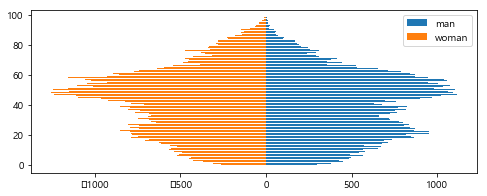

In [123]:
plt.figure(figsize=(8,3))
m = plt.barh(np.arange(len(city_man)), city_man, label='man')
m = plt.barh(np.arange(len(city_woman)), -city_woman, label='woman')
m = plt.legend()

In [115]:
city_man = np.sum(city_man, axis=0)
city_woman = np.sum(city_woman, axis=0)

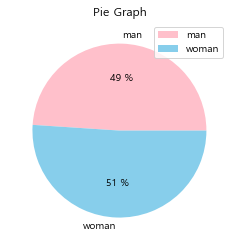

In [116]:
plt.rc('font', family="Malgun Gothic")
color = ['pink', 'skyblue']
plt.title('Pie Graph')
m = plt.pie([city_man,city_woman], labels= ['man', 'woman'], autopct='%.0f %%', colors=color, explode = (0, 0))
m = plt.legend()

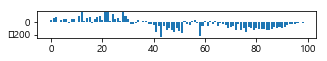

In [127]:
plt.figure(figsize=(5, 0.5))
m = plt.bar(np.arange(len(city_man)), city_man -city_woman)

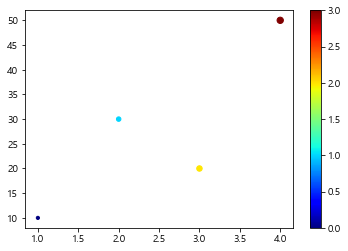

In [134]:
color=['red', 'green', 'black', 'blue']
n = plt.scatter([1,2,3,4], [10,30,20,50], s = [10,20,30,40], c= range(4), cmap='jet')
n = plt.colorbar()

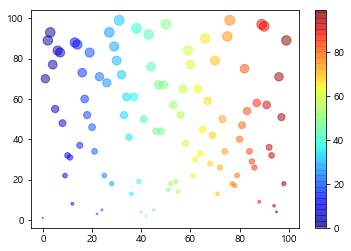

In [138]:
y = np.random.randint(0, 100, size= 100)
n = plt.scatter(np.arange(len(y)), y, s=y ,c=range(len(y)), cmap= 'jet', alpha=0.5)
n = plt.colorbar()

<um> unordered list tag <ol> ordered list
- plot(x) , plot(x, y)   선
- hist (x)               히스토그램
- boxplot(x)
- bar (x, y), barh(x, y) 막대그래프
- pie(x)
- scatter(x, y)          산점도